In [ ]:
# Convergence Algorithm :-

# Initialize any random value for each model parameters

# repeat until convergence:
#   for each βᵢ:
#        Δᵢ = ∂J/∂βᵢ        # compute all partial derivatives (gradient vector)
#   for each βᵢ:
#        βᵢ = βᵢ - α·Δᵢ     # update all βᵢ together
#   if (|Δ| < ϵ):   
#          break            # if magnitude of update vector becomes tiny break


# Note :- 
# Here, α is the learning rate.
# Higher Value of α can converge quickly but also prematurely (local optima)
# Lower Value of α converges slowly but gives better results

#   For linear regression / logistic regression:
#       - 0.001 to 0.1 (most commonly used)
#       - With normalization: 0.01 works extremely well

#   For neural networks:
#       - 0.0001 to 0.01

#   For deep CNNs / RNNs:
#       - 1e−5 to 1e−3

In [ ]:
# Example of Simple Regression Model Training

# Model :-
# Let Y = Salary, X = YearsExperience

# Y = β₀ + β₁.X
# J = (1/n) * Σ(yᵢ - β₀ - β₁.x)²

# δJ/δβ₀ = 2 * (β₀ + β₁.x̄ - ȳ)              Will be used in gradient descent algo
# δJ/δβ₁ = 2 * (β₀x̄ + β₁.x̄² - x̄ȳ)

In [ ]:
import math
import pandas as pd
from matplotlib import pyplot as plotter

df = pd.read_csv('./assets/simple_regression_salary.csv', index_col = 0)
df.head()

df.drop_duplicates()
df = df[df.notna().all(axis = 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [45]:
# Standardize the Inputs
years_mean = df['YearsExperience'].mean()
years_std = df['YearsExperience'].std()
salary_mean = df['Salary'].mean()
salary_std = df['Salary'].std()

df['YearsNormalized'] = (df['YearsExperience'] - years_mean)/years_std
df['SalaryNormalized'] = (df['Salary'] - salary_mean)/salary_std

df.head()

,YearsExperience,Salary,YearsNormalized,SalaryNormalized
0,1.2,39344.0,-1.484672,-1.337252
1,1.4,46206.0,-1.414197,-1.086946
2,1.6,37732.0,-1.343722,-1.396053
3,2.1,43526.0,-1.167535,-1.184705
4,2.3,39892.0,-1.097060,-1.317262


In [ ]:
# Precomputing necessary values for gradient function
mean_x = df['YearsNormalized'].mean()
mean_y = df['SalaryNormalized'].mean()
mean_xy = (df['YearsNormalized']*df['SalaryNormalized']).mean()
mean_x_sq = df['YearsNormalized'].apply(lambda x: x**2).mean()

# define gradient_functions
def grad0(x_mean, y_mean, beta0, beta1):
    return 2*(beta0 + beta1 * x_mean - y_mean)

def grad1(x_mean, xy_mean, x_sq_mean, beta0, beta1):
    return 2*(beta0 * x_mean + beta1 * x_sq_mean - xy_mean)

# define learning rate
alpha = 0.001

Model : Y = 24877.7928 + 9445.14467.X
Magnitude of Loss Function: 0.00099952843339769


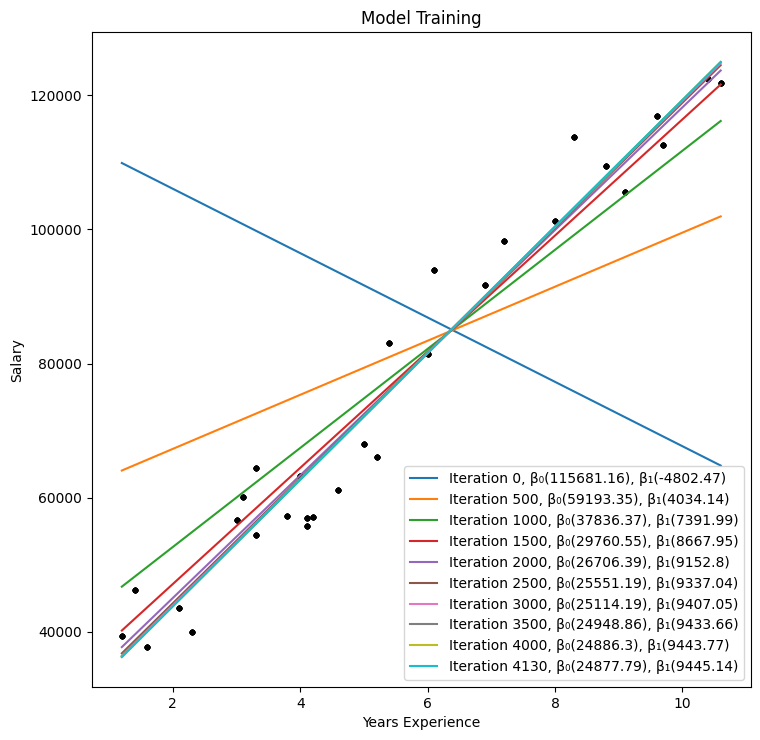

In [74]:
# Visualising Model Training (Gradient Descent Agorithm)

# Initialize Model Parameters with random values
beta0 = 0.5
beta1 = -0.5

X = pd.Series([x for x in df['YearsNormalized']])
plotter.figure(figsize=(8.5, 8.5))
iterations = 0

while True:
    iterations += 1
    grad_vector = [grad0(mean_x, mean_y, beta0, beta1), grad1(mean_x, mean_xy, mean_x_sq, beta0, beta1)]
    beta0 = beta0 - alpha*(grad_vector[0])
    beta1 = beta1 - alpha*(grad_vector[1])

    magnitude = math.sqrt(grad_vector[0]**2 + grad_vector[1]**2)

    if magnitude < 0.001 or iterations > 5000 or (iterations-1)%500 == 0:
        # computing origial model parameters from standardized parameters
        beta0_orig = salary_mean + salary_std * beta0 - (beta1 * years_mean * salary_std) / years_std
        beta1_orig = (salary_std / years_std) * beta1

        predictedY = [beta0_orig + beta1_orig * x for x in df['YearsExperience']]

        plotter.subplot(1,1,1)
        plotter.title("Model Training")
        plotter.xlabel('Years Experience')
        plotter.ylabel('Salary')

        plotter.scatter(df['YearsExperience'], df['Salary'], marker='.', color = 'black')
        plotter.plot(df['YearsExperience'], predictedY, label=f'Iteration {iterations-1}, β₀({round(beta0_orig,2)}), β₁({round(beta1_orig,2)})')
        plotter.legend()

    if magnitude < 0.001 or iterations > 5000:
        print(f"Model : Y = {round(beta0_orig, 5)} + {round(beta1_orig, 5)}.X")
        print('Magnitude of Loss Function:', magnitude)
        break

plotter.show()